In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import _tree

In [2]:
# Load the dataset
data = pd.read_csv('titanic.csv')  
data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [3]:
# Prepare the data
data = data[['Pclass','Name', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare', 'Survived']]
data.dropna(inplace=True)  # Drop rows with missing values

In [4]:
# Convert categorical attributes to numeric
data_encoded = pd.get_dummies(data, drop_first=True)

# Split the data into features and target
X = data_encoded.drop('Survived', axis=1)
y = data_encoded['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Initialize and train the Decision Tree Classifier with Gini Index
clf_categorical = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_categorical.fit(X_train, y_train)

# Make predictions
y_pred_categorical = clf_categorical.predict(X_test)

# Evaluate accuracy
accuracy_categorical = accuracy_score(y_test, y_pred_categorical)
print("Decision Tree Accuracy:", accuracy_categorical)

Decision Tree Accuracy: 0.8052434456928839


In [6]:
report_dt = classification_report(y_test, y_pred_categorical)
print("Decision Tree Classification Report:\n", report_dt)

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.86       166
           1       0.84      0.60      0.70       101

    accuracy                           0.81       267
   macro avg       0.81      0.77      0.78       267
weighted avg       0.81      0.81      0.80       267



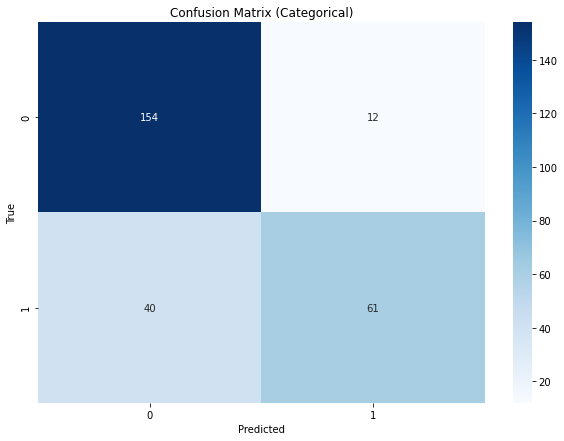

In [7]:
# Display confusion matrix
cm_categorical = confusion_matrix(y_test, y_pred_categorical)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_categorical, annot=True, fmt='d', cmap='Blues', xticklabels=clf_categorical.classes_, yticklabels=clf_categorical.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Categorical)')
plt.show()

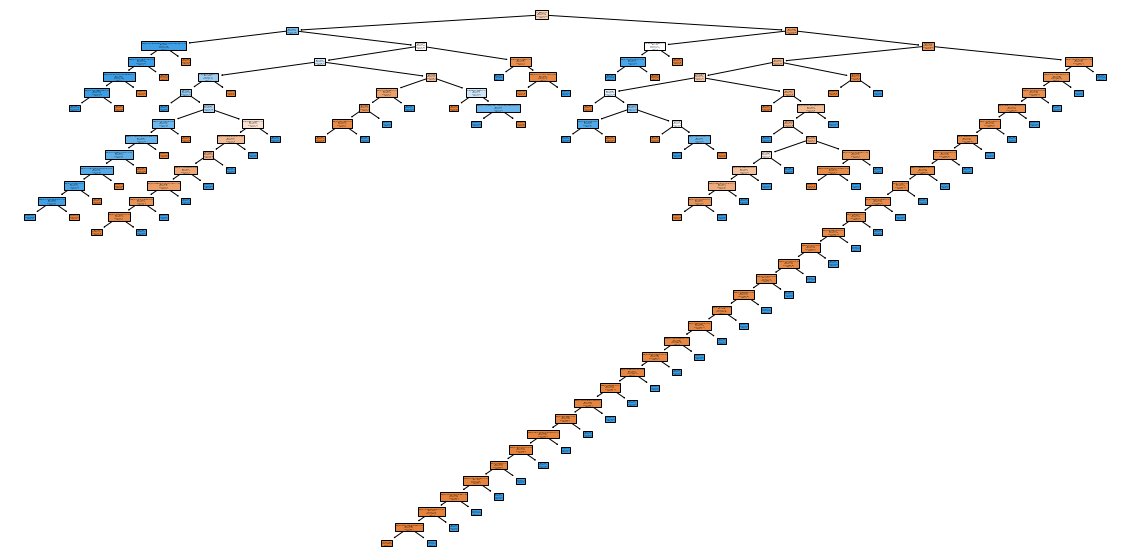

In [8]:
# Convert class names to strings
class_names = [str(cls) for cls in clf_categorical.classes_]

# Display the complete tree
plt.figure(figsize=(20,10))
plot_tree(clf_categorical, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()

In [9]:
# Display Gini Index of each node
def extract_gini_index(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    
    # Extract gini index for each node
    nodes = {
        "Node": range(tree_.node_count),
        "Feature": feature_name,
        "Gini": [tree_.impurity[i] for i in range(tree_.node_count)]
    }
    
    return pd.DataFrame(nodes)

In [10]:
# Extract and display Gini Index for each node
gini_df_categorical = extract_gini_index(clf_categorical, X.columns)
print('Gini Index of each node (Categorical):')
print(gini_df_categorical)

Gini Index of each node (Categorical):
     Node                                            Feature      Gini
0       0                                           Sex_male  0.475229
1       1                                             Pclass  0.370652
2       2  Name_Mrs. William John Robert (Dorothy Ann Won...  0.060093
3       3                   Name_Miss. Helen Loraine Allison  0.045776
4       4          Name_Mrs. William (Anna Sylfven) Lahtinen  0.031000
..    ...                                                ...       ...
166   166                                         undefined!  0.000000
167   167                                         undefined!  0.000000
168   168                                         undefined!  0.000000
169   169                                         undefined!  0.000000
170   170                                         undefined!  0.000000

[171 rows x 3 columns]


In [11]:
# Import necessary libraries
from sklearn.preprocessing import OrdinalEncoder

# Drop irrelevant columns
data = data.drop(columns=['Name'])

# Define the proper order for ordinal features
ordinal_features = {
    'Pclass': [1, 2, 3],  # Ordinal order for 'Pclass'
    'Sex': ['male', 'female']  # Ordinal order for 'Sex'
}

# Apply ordinal encoding with the correct order
ordinal_encoder = OrdinalEncoder(categories=[ordinal_features['Pclass'], ordinal_features['Sex']])
data_encoded = data.copy()

# Encode the 'Pclass' and 'Sex' columns using OrdinalEncoder
data_encoded[['Pclass', 'Sex']] = ordinal_encoder.fit_transform(data[['Pclass', 'Sex']])

In [12]:
# Split the data into features and target
X = data_encoded.drop('Survived', axis=1)
y = data_encoded['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree Classifier with Gini Index
clf_ordinal = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_ordinal.fit(X_train, y_train)

# Make predictions
y_pred_ordinal = clf_ordinal.predict(X_test)

# Evaluate accuracy
accuracy_ordinal = accuracy_score(y_test, y_pred_ordinal)
print("Decision Tree Accuracy:", accuracy_ordinal)

Decision Tree Accuracy: 0.7752808988764045


In [13]:
report_dt = classification_report(y_test, y_pred_ordinal)
print("Decision Tree Classification Report:\n", report_dt)

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       166
           1       0.71      0.69      0.70       101

    accuracy                           0.78       267
   macro avg       0.76      0.76      0.76       267
weighted avg       0.77      0.78      0.77       267



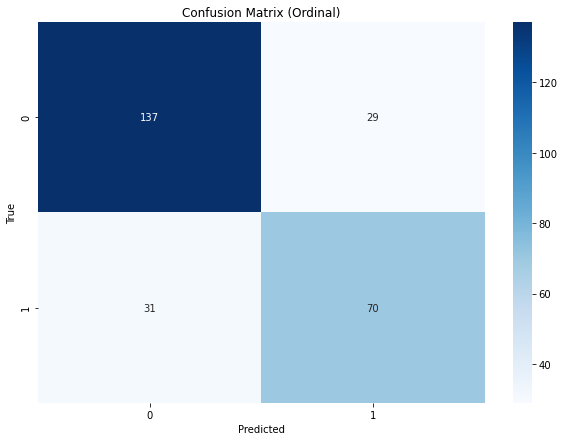

In [14]:
# Display confusion matrix
cm_ordinal = confusion_matrix(y_test, y_pred_ordinal)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_ordinal, annot=True, fmt='d', cmap='Blues', xticklabels=clf_ordinal.classes_, yticklabels=clf_ordinal.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Ordinal)')
plt.show()



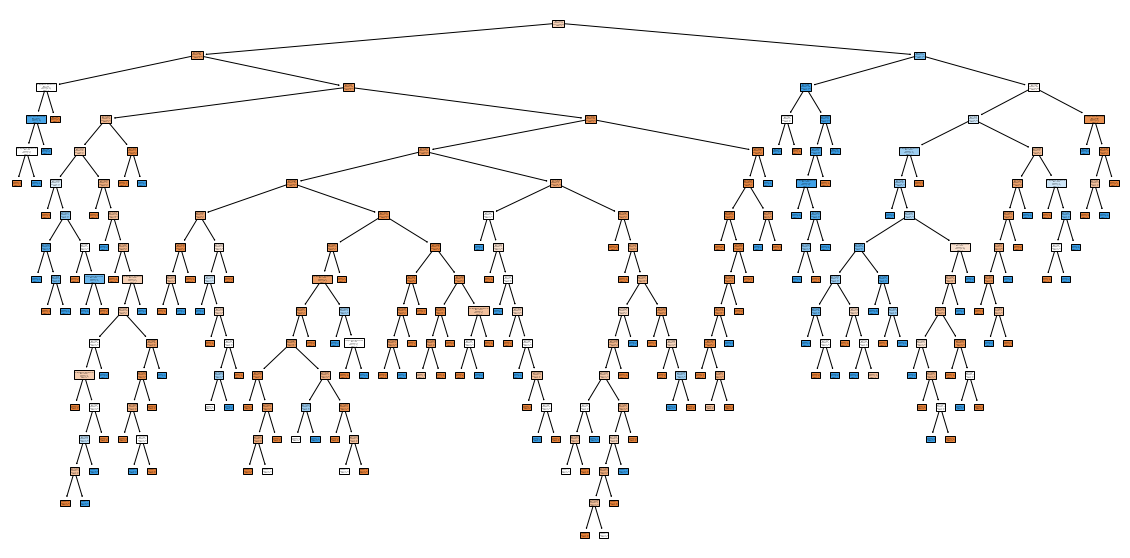

In [15]:
# Convert class names to strings
class_names = [str(cls) for cls in clf_ordinal.classes_]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf_ordinal, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()

In [16]:
# Display Gini Index of each node
gini_df_ordinal = extract_gini_index(clf_ordinal, X.columns)
print('Gini Index of each node (Ordinal):')
print(gini_df_ordinal)

Gini Index of each node (Ordinal):
     Node                  Feature      Gini
0       0                      Sex  0.475229
1       1                      Age  0.282336
2       2  Siblings/Spouses Aboard  0.500000
3       3  Parents/Children Aboard  0.132653
4       4  Siblings/Spouses Aboard  0.500000
..    ...                      ...       ...
268   268                      Age  0.104938
269   269                      Age  0.444444
270   270               undefined!  0.000000
271   271               undefined!  0.000000
272   272               undefined!  0.000000

[273 rows x 3 columns]


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the comparison data
comparison_data = {
    "Metric": ["Accuracy", "Confusion Matrix", "Gini Index"],
    "Categorical Encoding": [accuracy_categorical, cm_categorical, gini_df_categorical],
    "Ordinal Encoding": [accuracy_ordinal, cm_ordinal, gini_df_ordinal]
}

# Convert comparison data to DataFrame for easier handling
comparison_df = pd.DataFrame(comparison_data)

# Display accuracy comparison
print("Accuracy Comparison:")
print(f"Categorical Encoding Accuracy: {accuracy_categorical:.2f}")
print(f"Ordinal Encoding Accuracy: {accuracy_ordinal:.2f}\n")

Accuracy Comparison:
Categorical Encoding Accuracy: 0.81
Ordinal Encoding Accuracy: 0.78



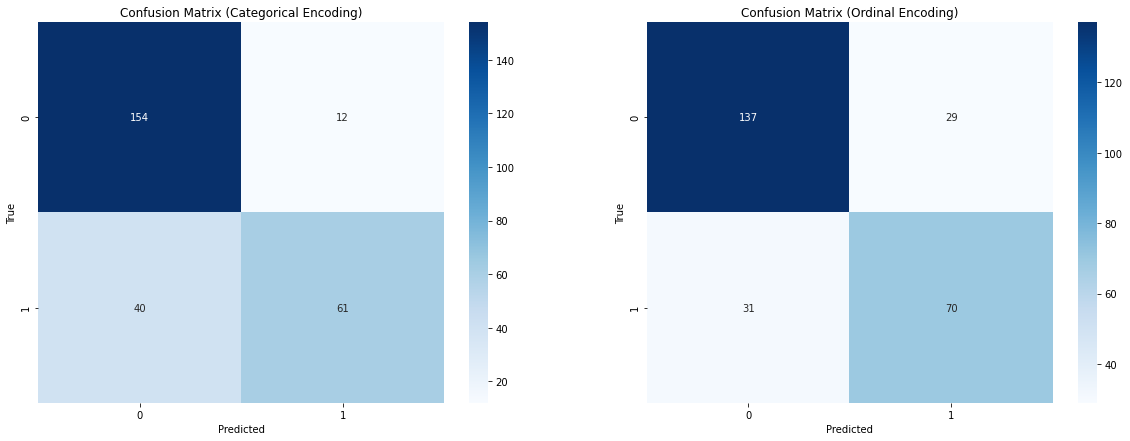

In [18]:
# Display confusion matrices
def plot_comparison_confusion_matrices(cm_cat, cm_ord, classes):
    fig, axes = plt.subplots(1, 2, figsize=(20, 7))
    
    sns.heatmap(cm_cat, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes, ax=axes[0])
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('True')
    axes[0].set_title('Confusion Matrix (Categorical Encoding)')
    
    sns.heatmap(cm_ord, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes, ax=axes[1])
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('True')
    axes[1].set_title('Confusion Matrix (Ordinal Encoding)')
    
    plt.show()

plot_comparison_confusion_matrices(cm_categorical, cm_ordinal, clf_categorical.classes_)

In [19]:
# Display Gini Index tables
def display_gini_comparison(gini_cat, gini_ord):
    print("Gini Index Comparison:")
    print("\nCategorical Encoding Gini Index:")
    print(gini_cat)
    
    print("\nOrdinal Encoding Gini Index:")
    print(gini_ord)

display_gini_comparison(gini_df_categorical, gini_df_ordinal)

Gini Index Comparison:

Categorical Encoding Gini Index:
     Node                                            Feature      Gini
0       0                                           Sex_male  0.475229
1       1                                             Pclass  0.370652
2       2  Name_Mrs. William John Robert (Dorothy Ann Won...  0.060093
3       3                   Name_Miss. Helen Loraine Allison  0.045776
4       4          Name_Mrs. William (Anna Sylfven) Lahtinen  0.031000
..    ...                                                ...       ...
166   166                                         undefined!  0.000000
167   167                                         undefined!  0.000000
168   168                                         undefined!  0.000000
169   169                                         undefined!  0.000000
170   170                                         undefined!  0.000000

[171 rows x 3 columns]

Ordinal Encoding Gini Index:
     Node                  Feature   

In [20]:
# Summary Table
comparison_summary = pd.DataFrame({
    'Metric': ['Accuracy', 'Confusion Matrix', 'Gini Index'],
    'Categorical Encoding': [accuracy_categorical, 'See plot above', 'See table above'],
    'Ordinal Encoding': [accuracy_ordinal, 'See plot above', 'See table above']
})

print("\nComparison Summary:")
print(comparison_summary)


Comparison Summary:
             Metric Categorical Encoding Ordinal Encoding
0          Accuracy             0.805243         0.775281
1  Confusion Matrix       See plot above   See plot above
2        Gini Index      See table above  See table above
